In [1]:
import xarray

import matplotlib.pyplot as plt 

from matplotlib.colors import LogNorm

In [2]:
dat_xr=xarray.open_dataset('https://www.oceancolour.org/thredds/dodsC/CCI_ALL-v5.0-MONTHLY')

subset=dat_xr.loc[dict(lat=slice(60,30), lon=slice(-170, -150), time=slice('2010-01-01','2016-12-01'))]

help, subset


(Type help() for interactive help, or help(object) for help about object.,
 <xarray.Dataset>
 Dimensions:             (lat: 720, lon: 480, time: 84)
 Coordinates:
   * lat                 (lat) float64 59.98 59.94 59.9 ... 30.1 30.06 30.02
   * lon                 (lon) float64 -170.0 -169.9 -169.9 ... -150.1 -150.0
   * time                (time) datetime64[ns] 2010-01-01 ... 2016-12-01
 Data variables: (12/93)
     crs                 (time) int32 ...
     Rrs_412             (time, lat, lon) float32 ...
     Rrs_443             (time, lat, lon) float32 ...
     Rrs_490             (time, lat, lon) float32 ...
     Rrs_510             (time, lat, lon) float32 ...
     Rrs_560             (time, lat, lon) float32 ...
     ...                  ...
     MODISA_nobs_sum     (time, lat, lon) float32 ...
     VIIRS_nobs_sum      (time, lat, lon) float32 ...
     OLCI_nobs_sum       (time, lat, lon) float32 ...
     MERIS_nobs_sum      (time, lat, lon) float32 ...
     SeaWiFS_nobs_sum    (

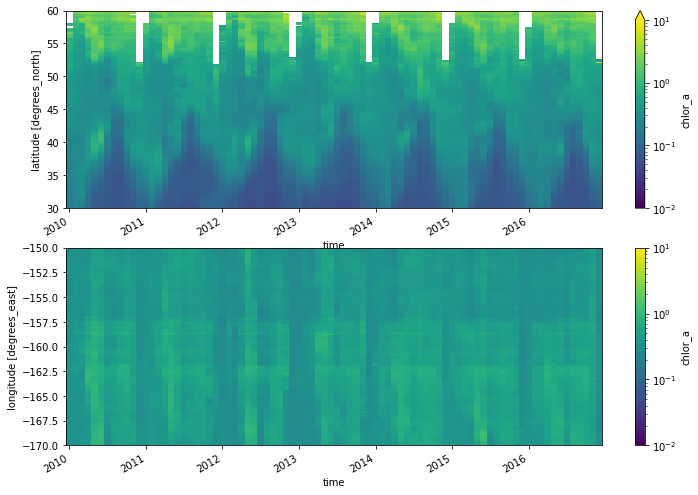

In [3]:
chl_lon_hov=subset.chlor_a.mean(dim='lon').load()

chl_lat_hov=subset.chlor_a.mean(dim='lat').load()

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,8))

chl_lon_hov.transpose().plot(norm=LogNorm(vmin=0.01, vmax=10.0),ax=ax1, cmap='viridis')

chl_lat_hov.transpose().plot(norm=LogNorm(vmin=0.01, vmax=10.0),ax=ax2, cmap='viridis')